<a href="https://colab.research.google.com/github/Chirag099/ISRAEL_PALESTINE_EDA/blob/main/EDA_ISRAEL_PALESTINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [514]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


In [515]:
import warnings
warnings.filterwarnings('ignore')

Loading DataSet

In [516]:
df = pd.read_csv("Palestine Body Count (1).csv")

Exploring DataSet

In [517]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36


In [518]:
df.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
246,2021.0,MARCH,NaN,NaN,4,0
247,2021.0,APRIL,NaN,NaN,1,0
248,2021.0,MAY,NaN,NaN,26,3
249,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,"111,475","5,160","10,000","1,275"


In [519]:
df.shape

(251, 6)

In [520]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [521]:
df.isnull().sum()

Year                       2
Month                      2
Palestinians Injuries     55
Israelis Injuries        118
Palestinians Killed        1
Israelis Killed            1
dtype: int64

In [522]:
df.dropna(how = 'all',inplace=True)
df.drop(df.index[249],inplace=True)
df.drop(df.index[165],inplace=True)
df.drop(df.index[202],inplace=True)

In [523]:
df.isnull().sum()

Year                       0
Month                      0
Palestinians Injuries     54
Israelis Injuries        117
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [524]:
df["Israelis Killed"] = pd.to_numeric(df["Israelis Killed"])
df["Palestinians Killed"] = pd.to_numeric(df["Palestinians Killed"])

In [525]:
 df.dropna(inplace=True)

In [526]:
df.isnull().sum()

Year                     0
Month                    0
Palestinians Injuries    0
Israelis Injuries        0
Palestinians Killed      0
Israelis Killed          0
dtype: int64

In [527]:
df["Israelis Injuries"] = df["Israelis Injuries"].astype(float)
df["Palestinians Injuries"] = df["Palestinians Injuries"].astype(float)

In [528]:
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
52,2005.0,DECEMBER,166.0,88.0,20,8
53,2005.0,NOVEMBER,99.0,17.0,15,1
54,2005.0,OCTOBER,81.0,46.0,22,10
55,2005.0,SEPTEMBER,90.0,25.0,17,1
56,2005.0,AUGUST,130.0,16.0,11,0
...,...,...,...,...,...,...
202,2017.0,JUNE,790.0,20.0,8,1
204,2017.0,APRIL,150.0,12.0,5,1
205,2017.0,MARCH,189.0,19.0,7,0
206,2017.0,FEBRUARY,97.0,37.0,6,0


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 52 to 207
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   130 non-null    float64
 1   Month                  130 non-null    object 
 2   Palestinians Injuries  130 non-null    float64
 3   Israelis Injuries      130 non-null    float64
 4   Palestinians Killed    130 non-null    int64  
 5   Israelis Killed        130 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 7.1+ KB


In [530]:
df.describe()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2011.392308,589.476923,39.692308,21.646154,1.507692
std,3.900897,1862.325537,205.857023,59.227568,2.564656
min,2005.000000,42.000000,0.000000,0.000000,0.000000
25%,2007.000000,119.250000,7.250000,3.000000,0.000000
50%,2012.000000,172.500000,15.000000,8.000000,0.000000
75%,2015.000000,283.250000,24.000000,19.500000,2.000000
max,2017.000000,13735.000000,2347.000000,614.000000,13.000000


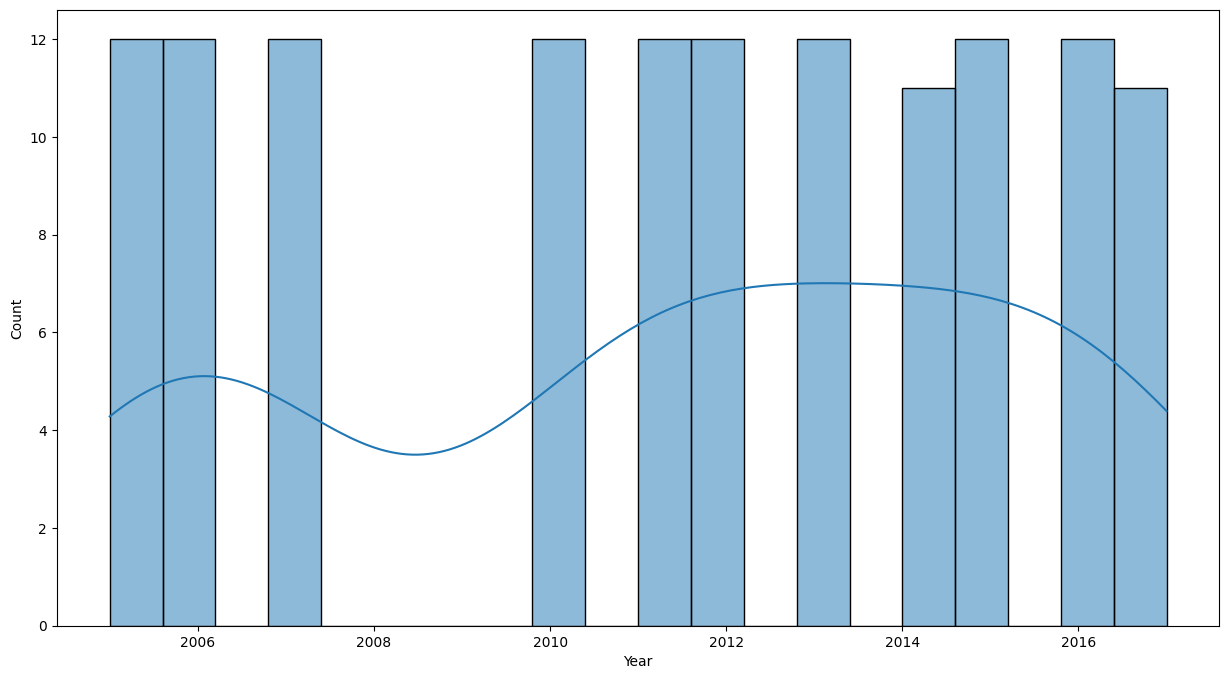

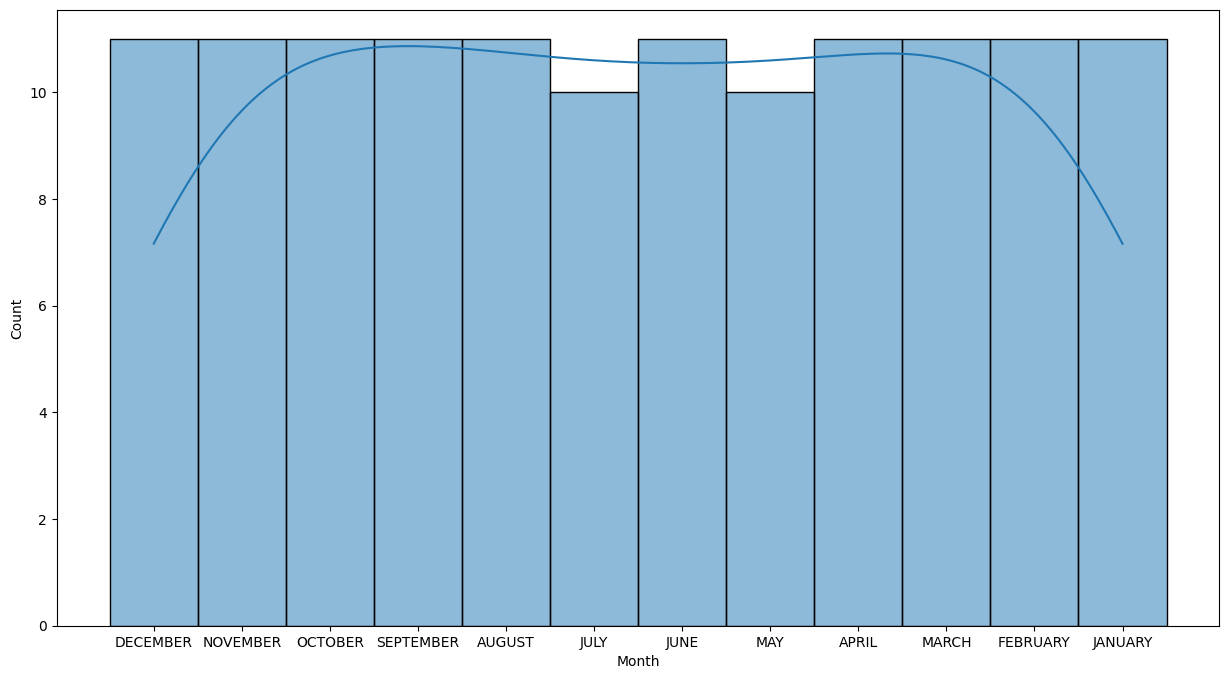

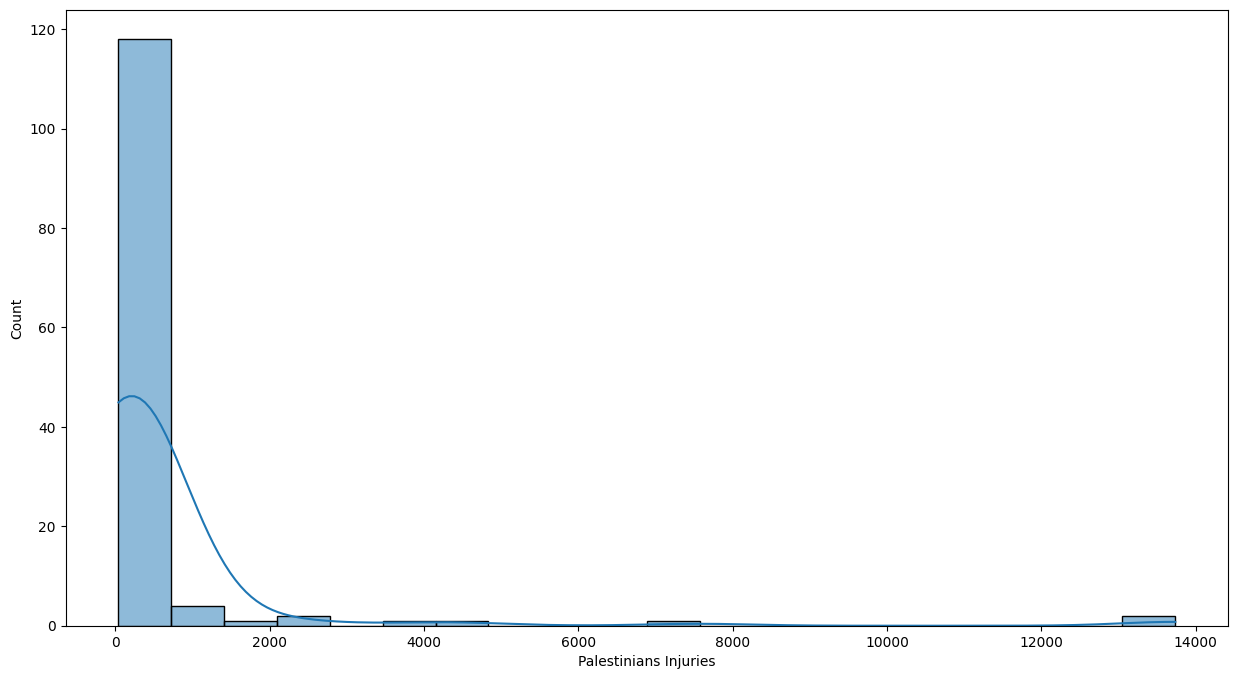

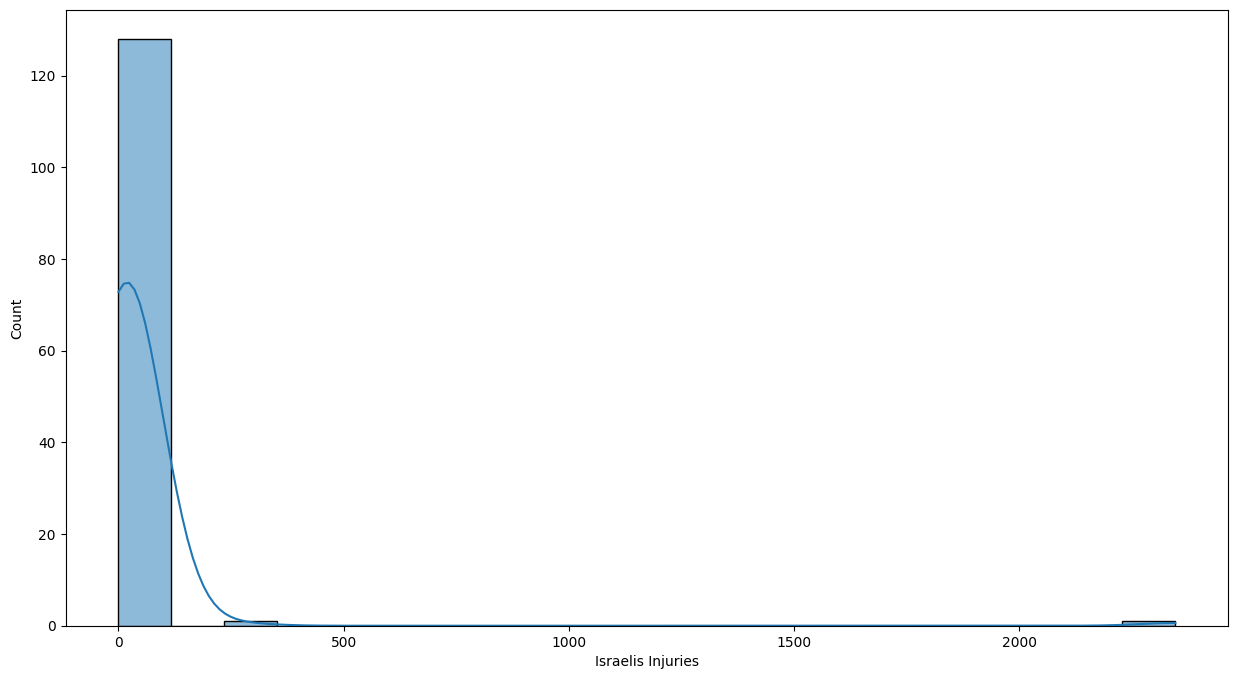

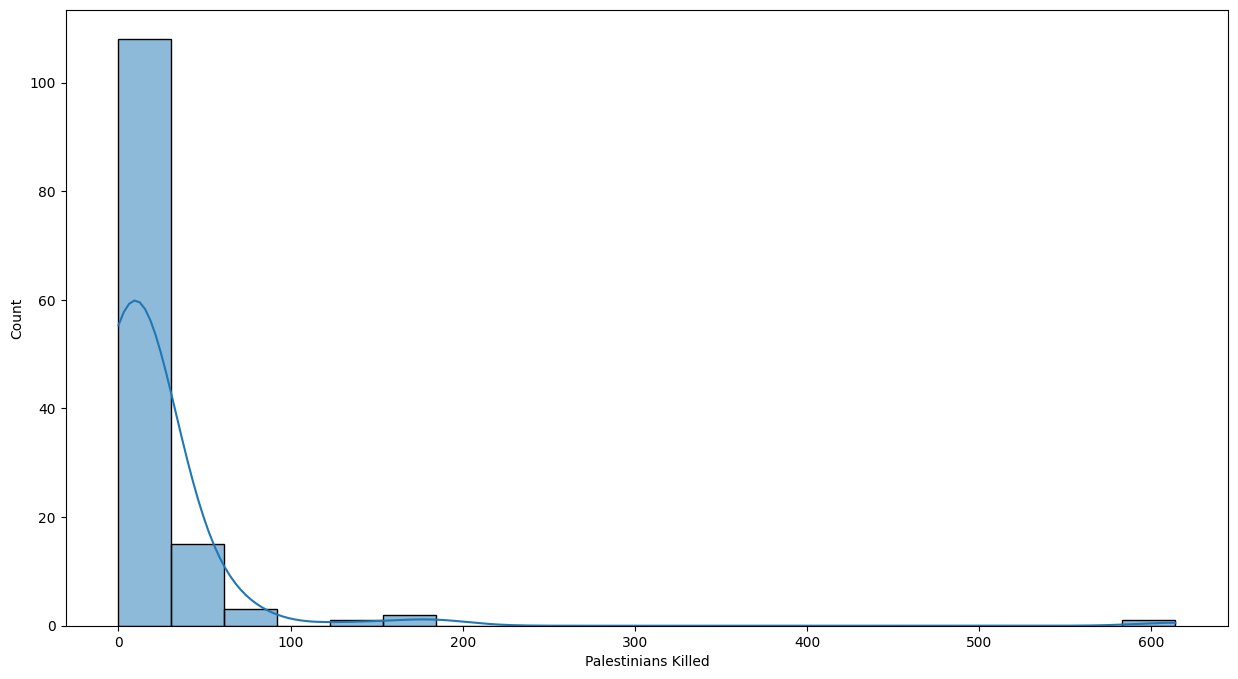

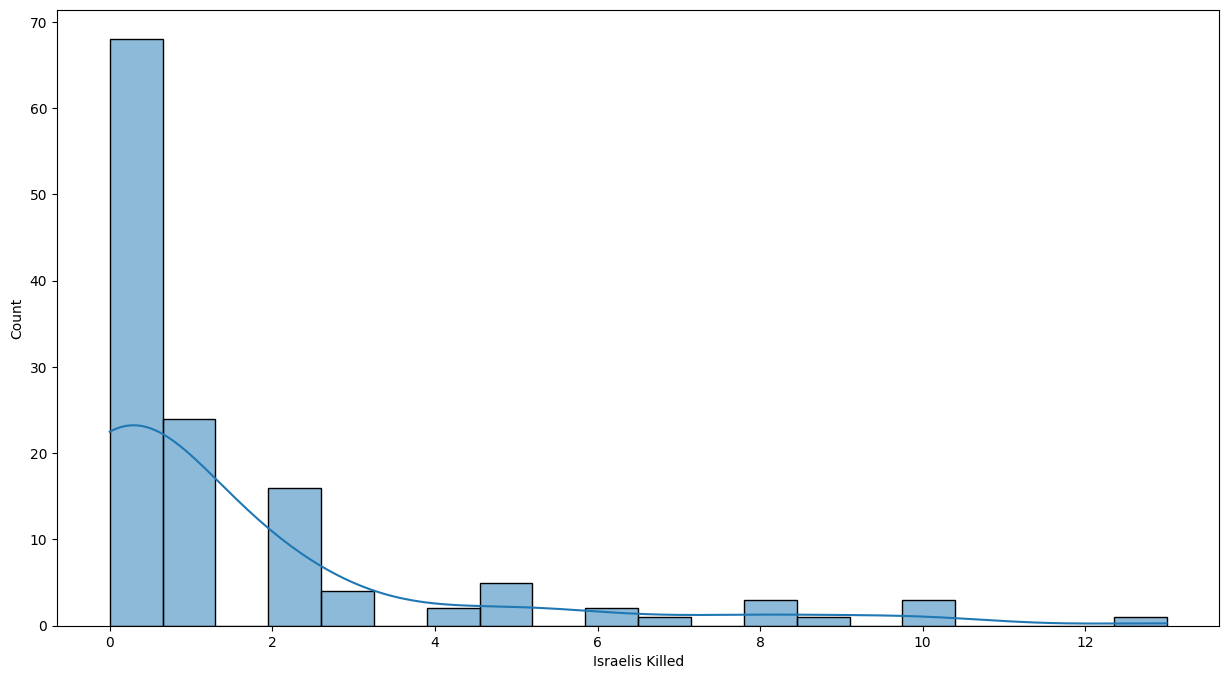

In [531]:
for i in df.columns:
  plt.figure(figsize=(15,8))
  sns.histplot(df[i],kde=True,bins=20)
  plt.show()

In [532]:
DF = pd.DataFrame(df.groupby("Year")["Palestinians Killed"].max().sort_values(ascending = False))
DF.reset_index(level=0,inplace=True)
fig = px.pie(DF, values='Palestinians Killed',names='Year',hover_data=['Palestinians Killed'],labels={'country':'country'})
fig.update_layout(title='Palestinians Killed By Year')
fig.show()

In [533]:
DF = pd.DataFrame(df.groupby("Year")['Israelis Killed'].max().sort_values(ascending = False))
DF.reset_index(level=0,inplace=True)
fig = px.pie(DF, values = 'Israelis Killed',names='Year',hover_data=['Israelis Killed'],labels={'country':'country'})
fig.update_layout(title='Israelis Killed By Year')
fig.show()

In [534]:
DF = pd.DataFrame(df.groupby("Month")["Palestinians Killed"].max().sort_values(ascending = False))
DF.reset_index(level=0,inplace=True)
fig = px.pie(DF,values='Palestinians Killed',names='Month',hover_data=['Palestinians Killed'],labels={'country':'country'})
fig.update_layout(title='Palestinians Killed By Months')

In [535]:
DF = pd.DataFrame(df.groupby("Month")["Israelis Killed"].max().sort_values(ascending=True))
DF.reset_index(level=0,inplace=True)
fig = px.pie(DF,values='Israelis Killed',names='Month',hover_data=['Israelis Killed'],labels={'country':'country'})
fig.update_layout(title='Israelis Killed By Months')

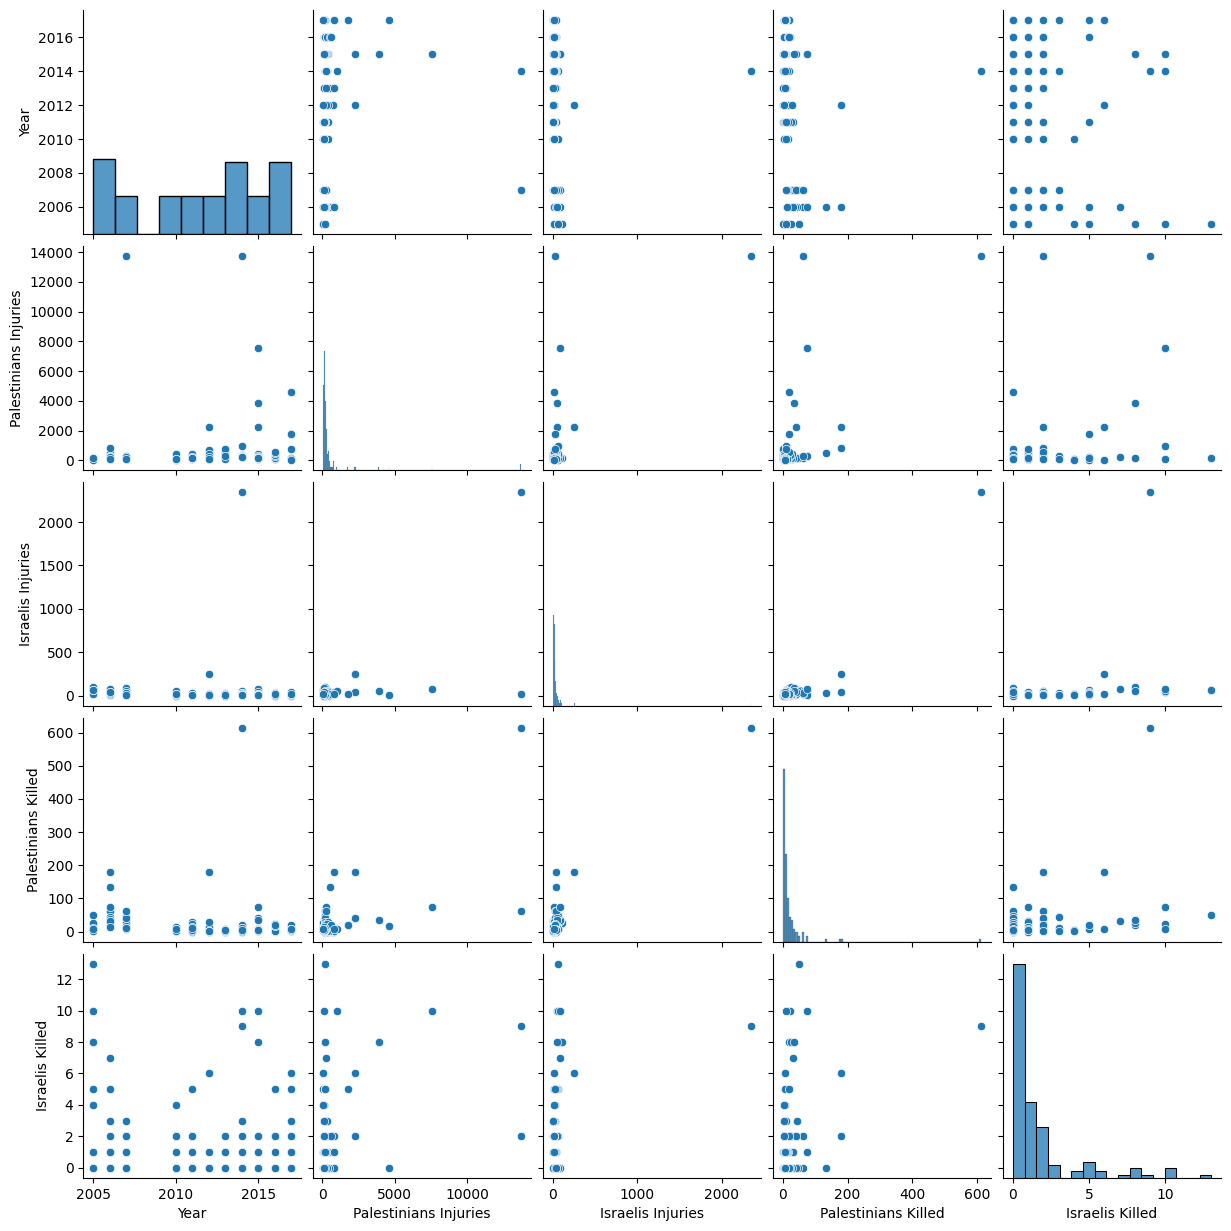

In [536]:
sns.pairplot(df)

In [537]:
df.corr()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
Year,1.000000,0.079115,0.028494,-0.098172,-0.133965
Palestinians Injuries,0.079115,1.000000,0.638875,0.662420,0.335019
Israelis Injuries,0.028494,0.638875,1.000000,0.912801,0.327025
Palestinians Killed,-0.098172,0.662420,0.912801,1.000000,0.348680
Israelis Killed,-0.133965,0.335019,0.327025,0.348680,1.000000


<Axes: >

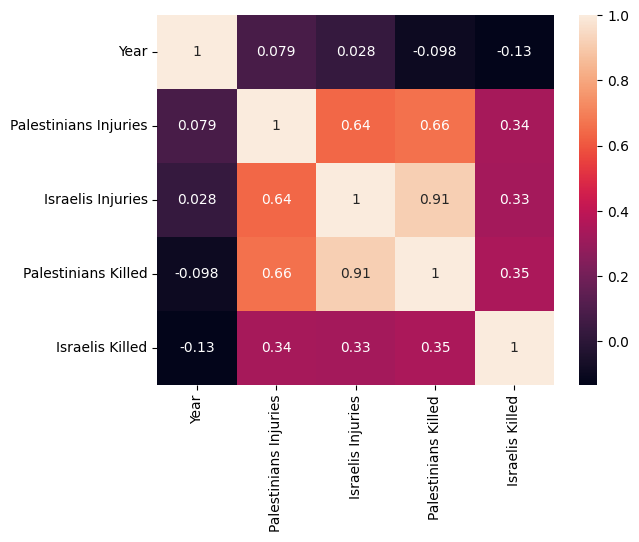

In [538]:
sns.heatmap(df.corr(),annot=True)

In [539]:
from scipy.stats import pearsonr

data1 = df['Palestinians Injuries']
data2 = df['Israelis Injuries']
data3 = df['Palestinians Killed']
data4 = df['Israelis Killed']

corr,_ = pearsonr(data1,data2)
print('Pearsons correlation: %.3f' %corr)
corr1,_ = pearsonr(data3,data4)
print('Pearsons correlation: %.3f' %corr1)

Pearsons correlation: 0.639
Pearsons correlation: 0.349


Higher Correlation between injuries of Palestinians and Israelis. When Injuries in Palestinians increases, injuries in Israelis increases too.

Lower Correlation indicates that rate of people killed in Palestine is not proportinal to the number of People Killed in Israel.